In [ ]:
# Uncomment when importing from GitHub
# !git clone https://www.github.com/simoneroncallo/quantum-optical-neuron.git
# %cd /content/quantum-optical-neuron
# !mkdir ./output/data

# Uncomment when importing from Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/'Colab Notebooks'/quantum-optical-neuron

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/quantum-optical-neuron


In [ ]:
import sys

# Uncomment when importing from GitHub
# dir = '/content/quantum-optical-neuron'

# Uncomment when importing from Google Drive
# dir = '/content/drive/MyDrive/"Colab Notebooks"/quantum-optical-neuron'

sys.path.append(dir)
from qon import sig, sigPrime
from qon import neuron, loss, accuracy
from qon import spatial_loss_derivative, Fourier_loss_derivative
from qon import update_rule, optimization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models, activations, optimizers
from keras.datasets import mnist
from keras.utils import set_random_seed

In [ ]:
# Set the seeds
np.random.seed(2024)
set_random_seed(2024)

In [ ]:
# Hyperparameters
numEpochs = 150
learningRateWeights = 0.075
learningRateBias = 0.005

# Dataset
We use the MNIST dataset, which contains $28 \times 28$ images of handwritten digits from $0$ to $9$. We guarantee a fair comparison by increasing the MNIST resolution to $32 \times 32$ pixels (separately padding each image of the dataset). We train  the models to distinguish among images of *zeros* and *ones*.

After normalization, each element of the dataset is identified with the corrisponding amplitudes of quantum optical neuron input state, bypassing the simulation of the imaging apparatus.

In [ ]:
# Load the MNIST dataset
(trainImgs, trainLabels), (testImgs, testLabels) = mnist.load_data()

# Filter 0 and 1 from the dataset
train0s, test0s = np.where(trainLabels == 0), np.where(testLabels == 0)
train1s, test1s = np.where(trainLabels == 1), np.where(testLabels == 1)

train0sImgs = trainImgs[train0s[0]]
train1sImgs = trainImgs[train1s[0]]

test0sImgs = testImgs[test0s[0]]
test1sImgs = testImgs[test1s[0]]

trainImgs = np.concatenate((train0sImgs, train1sImgs), axis = 0)
testImgs = np.concatenate((test0sImgs, test1sImgs), axis = 0)

# Create the dataset of images and labels (0s and 1s)
train0Labels = np.zeros(train0sImgs.shape[0])
train1Labels = np.ones(train1sImgs.shape[0])
trainLabels = np.concatenate((train0Labels, train1Labels), axis = 0)

train0Labels = np.zeros(test0sImgs.shape[0])
test1Labels = np.ones(test1sImgs.shape[0])
testLabels = np.concatenate((train0Labels, test1Labels), axis = 0)

# Reshuffle images and labels consistently
idxs = np.arange(trainImgs.shape[0])
np.random.shuffle(idxs)

trainImgs = trainImgs[idxs]
trainLabels = trainLabels[idxs]

# Convert to float
trainImgs = trainImgs.astype(np.float64)
testImgs = testImgs.astype(np.float64)
trainLabels = trainLabels.astype(np.float64)
testLabels = testLabels.astype(np.float64)

## Identify each image to the discretized amplitudes of the single-photon state
for idx, trainImg in enumerate(trainImgs):
  # Normalization
  trainImgs[idx,:,:] = trainImg/np.sum(trainImg)
  if idx < testImgs.shape[0]:
    testImg = testImgs[idx,:,:]
    testImgs[idx,:,:] = testImg/np.sum(testImg) # Normalization

# Amplitudes
trainImgs = np.sqrt(trainImgs[:,:,:])
testImgs = np.sqrt(testImgs[:,:,:])

# Padding from 28x28 to 32x32
trainImgs = np.pad(trainImgs, ((0,0),(2,2),(2,2)), mode='constant', \
                   constant_values = 0)
testImgs = np.pad(testImgs, ((0,0),(2,2),(2,2)), mode='constant', \
                   constant_values = 0)

print('Training set has shape', trainImgs.shape)

11490434/11490434 [==============================] - 1s 0us/step
Training set has shape (12665, 32, 32)


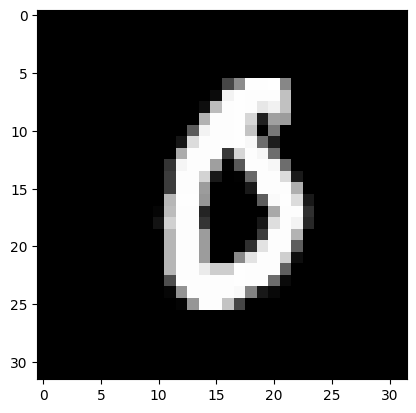

In [ ]:
# Print example
idx = 10
plt.imshow(np.square(trainImgs[idx,:,:]))
plt.gray()
plt.show()

# <font color='ORANGE'>Simulation</font>
 We numerically compare the predictability of the quantum optical neuron against that of conventional neural network designs, constrained to the same number of parameters.

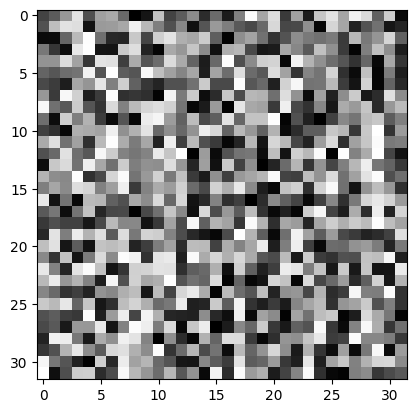

In [ ]:
# Parameters random initialization
initial_weights = np.random.uniform(-1,1,(32,32)) # Uniform sampling
bias = 0

# Normalization
norm = np.sum(np.square(initial_weights))
weights = initial_weights/np.sqrt(norm)

plt.imshow(weights[:,:])
plt.gray()

In [ ]:
# Training
weights, bias, loss_history, test_loss_history, accuracy_history,\
              test_accuracy_history = optimization(spatial_loss_derivative,\
                weights, bias, trainLabels, testLabels, trainImgs, testImgs,\
                  numEpochs, learningRateWeights, learningRateBias)

EPOCH 0
Loss 2.929379278301676 Val_Loss 2.952996009046783
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 1
Loss 2.759888307881211 Val_Loss 2.782035957438307
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 2
Loss 2.5904821750390057 Val_Loss 2.6110896109567516
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 3
Loss 2.4202959051876833 Val_Loss 2.4392290116793003
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 4
Loss 2.246989784405822 Val_Loss 2.263992099151536
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 5
Loss 2.064841809241797 Val_Loss 2.079418206230391
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 6
Loss 1.8609268604878415 Val_Loss 1.8721267522689469
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 7
Loss 1.6091906553793376 Val_Loss 1.6152719670651623
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 8
Loss 1.2699377796127425 Val_Loss

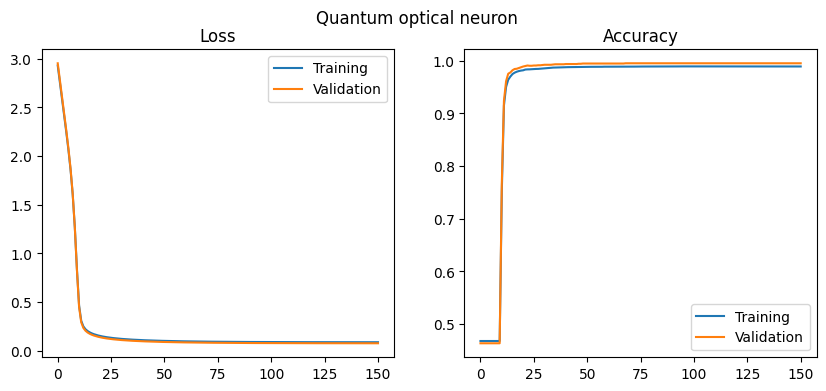

In [ ]:
# History plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(loss_history, label = 'Training')
ax1.plot(test_loss_history, label = 'Validation')

ax1.set_title('Loss')
ax1.legend()

ax2.plot(accuracy_history, label = 'Training')
ax2.plot(test_accuracy_history, label = 'Validation')

ax2.set_title('Accuracy')
ax2.legend()

fig.suptitle('Quantum optical neuron')
plt.show()

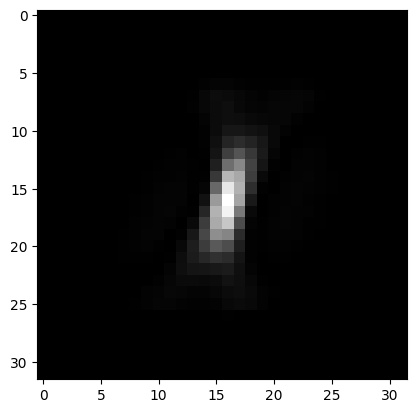

In [ ]:
# Parameters plot
# Normalization
norm = np.sum(np.square(weights))
weights = weights/np.sqrt(norm)

probWeights = np.square(weights)

plt.imshow(probWeights)
plt.gray()

plt.show()

### Single neuron

In [ ]:
model = models.Sequential()

model.add(layers.Flatten(input_shape=(32, 32, 1)))
model.add(layers.Dense(1, activation='sigmoid', use_bias=True))

model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = optimizers.SGD(learning_rate = learningRateWeights)
model.compile(optimizer=optimizer, loss='binary_crossentropy', \
              metrics=['accuracy'])
dense_history = model.fit(trainImgs, trainLabels, \
                    batch_size = trainImgs.shape[0], \
                    epochs = numEpochs,
                    validation_data=(testImgs, testLabels))

Epoch 1/150
1/1 [==============================] - 1s 769ms/step - loss: 0.6840 - accuracy: 0.7381 - val_loss: 0.6805 - val_accuracy: 0.8109
Epoch 2/150
1/1 [==============================] - 0s 76ms/step - loss: 0.6809 - accuracy: 0.7983 - val_loss: 0.6774 - val_accuracy: 0.8615
Epoch 3/150
1/1 [==============================] - 0s 86ms/step - loss: 0.6779 - accuracy: 0.8507 - val_loss: 0.6742 - val_accuracy: 0.8889
Epoch 4/150
1/1 [==============================] - 0s 89ms/step - loss: 0.6748 - accuracy: 0.8865 - val_loss: 0.6711 - val_accuracy: 0.9158
Epoch 5/150
1/1 [==============================] - 0s 79ms/step - loss: 0.6718 - accuracy: 0.9113 - val_loss: 0.6681 - val_accuracy: 0.9286
Epoch 6/150
1/1 [==============================] - 0s 99ms/step - loss: 0.6688 - accuracy: 0.9236 - val_loss: 0.6650 - val_accuracy: 0.9376
Epoch 7/150
1/1 [==============================] - 0s 89ms/step - loss: 0.6658 - accuracy: 0.9330 - val_loss: 0.6620 - val_accuracy: 0.9433
Epoch 8/150
1/1 [==

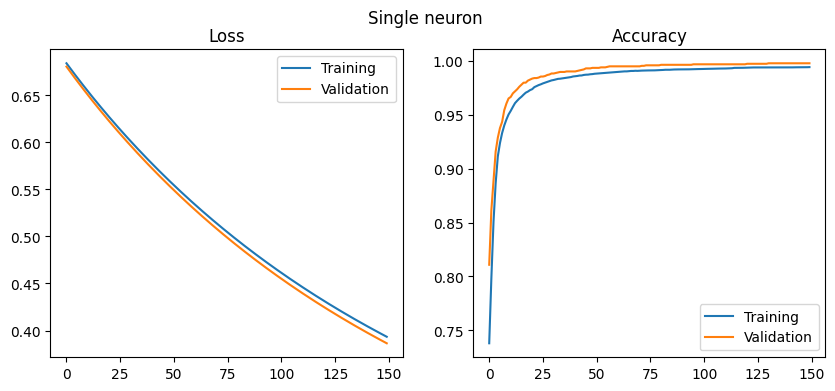

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(dense_history.history['loss'], label = 'Training')
ax1.plot(dense_history.history['val_loss'], label = 'Validation')

ax1.set_title('Loss')
ax1.legend()

ax2.plot(dense_history.history['accuracy'], label = 'Training')
ax2.plot(dense_history.history['val_accuracy'], label = 'Validation')

ax2.set_title('Accuracy')
ax2.legend()

fig.suptitle('Single neuron')
plt.show()

### Convolutional network

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(10, (3, 3), activation='linear', use_bias=False, \
                        input_shape=(32, 32, 1)))
model.add(layers.Conv2D(4, (2, 2), activation='linear', use_bias=False))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid', use_bias=True))

model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 10)        90        
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 4)         160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 4)         0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 785       
                                                                 
Total params: 1035 (4.04 KB)
Trainable params: 1035 (4.04 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [ ]:
optimizer = optimizers.SGD(learning_rate = learningRateWeights)
model.compile(optimizer=optimizer, loss='binary_crossentropy', \
              metrics=['accuracy'])
conv_history = model.fit(trainImgs, trainLabels, \
                    batch_size = trainImgs.shape[0], \
                    epochs = numEpochs,
                    validation_data=(testImgs, testLabels))

Epoch 1/150
1/1 [==============================] - 7s 7s/step - loss: 0.6950 - accuracy: 0.3682 - val_loss: 0.6946 - val_accuracy: 0.3768
Epoch 2/150
1/1 [==============================] - 5s 5s/step - loss: 0.6944 - accuracy: 0.3979 - val_loss: 0.6940 - val_accuracy: 0.4128
Epoch 3/150
1/1 [==============================] - 7s 7s/step - loss: 0.6938 - accuracy: 0.4286 - val_loss: 0.6934 - val_accuracy: 0.4534
Epoch 4/150
1/1 [==============================] - 5s 5s/step - loss: 0.6932 - accuracy: 0.4598 - val_loss: 0.6927 - val_accuracy: 0.4856
Epoch 5/150
1/1 [==============================] - 5s 5s/step - loss: 0.6926 - accuracy: 0.4933 - val_loss: 0.6921 - val_accuracy: 0.5239
Epoch 6/150
1/1 [==============================] - 6s 6s/step - loss: 0.6920 - accuracy: 0.5171 - val_loss: 0.6915 - val_accuracy: 0.5404
Epoch 7/150
1/1 [==============================] - 5s 5s/step - loss: 0.6914 - accuracy: 0.5347 - val_loss: 0.6909 - val_accuracy: 0.5480
Epoch 8/150
1/1 [=================

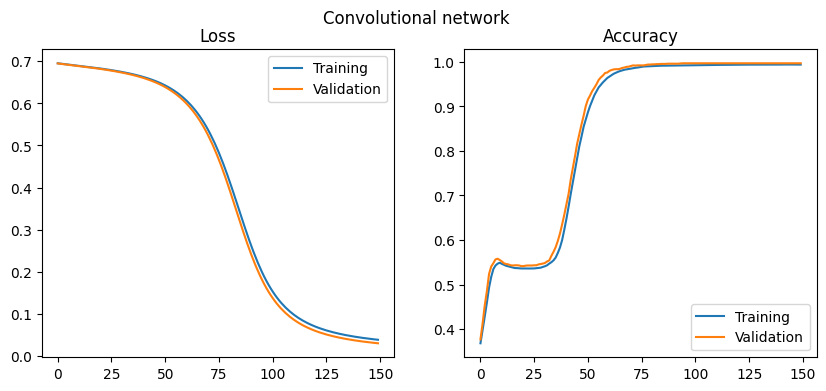

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(conv_history.history['loss'], label = 'Training')
ax1.plot(conv_history.history['val_loss'], label = 'Validation')

ax1.set_title('Loss')
ax1.legend()

ax2.plot(conv_history.history['accuracy'], label = 'Training')
ax2.plot(conv_history.history['val_accuracy'], label = 'Validation')

ax2.set_title('Accuracy')
ax2.legend()

fig.suptitle('Convolutional network')
plt.show()

## Comparison

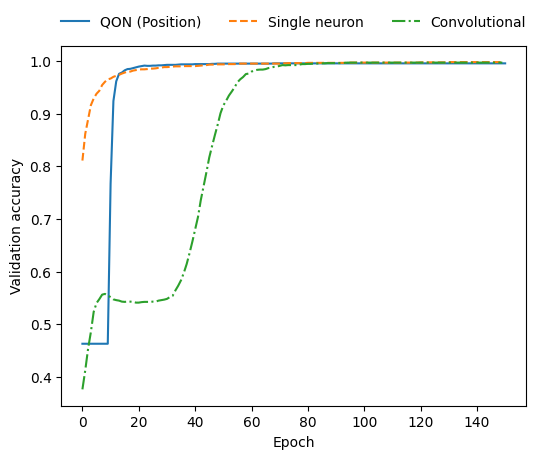

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 5.5))

# Main plot
ax1.plot(test_accuracy_history, linestyle = '-', \
         label = 'QON (Position)')

ax1.plot(dense_history.history['val_accuracy'], linestyle = '--', \
         label = 'Single neuron')

ax1.plot(conv_history.history['val_accuracy'], linestyle = '-.', \
         label = 'Convolutional')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation accuracy')

pos = ax1.get_position()
ax1.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
ax1.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12),
    ncol=3,
    frameon=False,
)

plt.show()

In [ ]:
# Quantum optical neuron history
np.save('output/data/MNISTposition_OQPloss.npy', test_loss_history)
np.save('output/data/MNISTposition_OQPacc.npy', test_accuracy_history)

# Single neuron history
np.save('output/data/MNISTposition_MLPloss.npy', \
          np.array(dense_history.history['val_loss']))
np.save('output/data/MNISTposition_MLPacc.npy', \
          np.array(dense_history.history['val_accuracy']))

# Convolutional network history
np.save('output/data/MNISTposition_CONVloss.npy', \
          np.array(conv_history.history['val_loss']))
np.save('output/data/MNISTposition_CONVacc.npy', \
          np.array(conv_history.history['val_accuracy']))

# <font color='ORANGE'>Simulation</font> (Fourier encoding)
We repeat the same analysis and comparisons by encoding the dataset in the Fourier domain.

In [ ]:
# Reinitialize the Tensorflow seed
set_random_seed(2024)

In [ ]:
# Compute the fast Fourier transform
trainFourierImgs = np.zeros(trainImgs.shape, dtype = np.complex64)
testFourierImgs = np.zeros(testImgs.shape, dtype = np.complex64)

for idx, trainImg in enumerate(trainImgs):
  trainFourierImgs[idx,:,:] = np.transpose(np.fft.fftshift(\
                          np.fft.fft2(trainImgs[idx,:,:], norm = "ortho")))
  if idx < testImgs.shape[0]:
    testFourierImgs[idx,:,:] = np.transpose(np.fft.fftshift(\
                          np.fft.fft2(testImgs[idx,:,:],  norm = "ortho")))

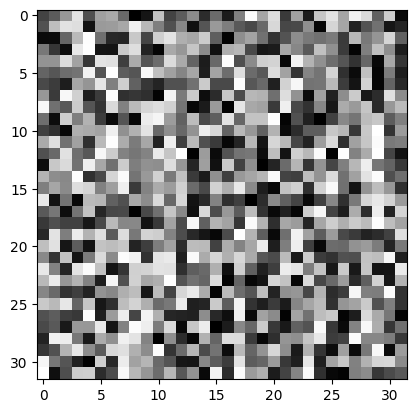

In [ ]:
# Parameters reinizialization and normalization
bias = 0
norm = np.sum(np.square(initial_weights))
weights = initial_weights/np.sqrt(norm)

plt.imshow(weights[:,:])
plt.gray()

In [ ]:
# Training
weights, bias, loss_history, test_loss_history, accuracy_history,\
        test_accuracy_history = optimization(Fourier_loss_derivative,\
          weights, bias, trainLabels, testLabels, trainFourierImgs,\
            testFourierImgs, numEpochs, learningRateWeights, learningRateBias)

EPOCH 0
Loss 2.9305751687476174 Val_Loss 2.954219956388519
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 1
Loss 2.7616474814893377 Val_Loss 2.7839687562217033
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 2
Loss 2.593002254940021 Val_Loss 2.613996362107457
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 3
Loss 2.4242766816435966 Val_Loss 2.443942476021874
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 4
Loss 2.2540670869055877 Val_Loss 2.272385559863802
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 5
Loss 2.078648292248433 Val_Loss 2.095535004696115
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 6
Loss 1.889249125984093 Val_Loss 1.9044434543857975
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 7
Loss 1.6671723042874078 Val_Loss 1.6799988489021596
Accuracy 0.46766679826292934 Val_Acc 0.46335697399527187
---
EPOCH 8
Loss 1.3794945202227722 Val_Loss

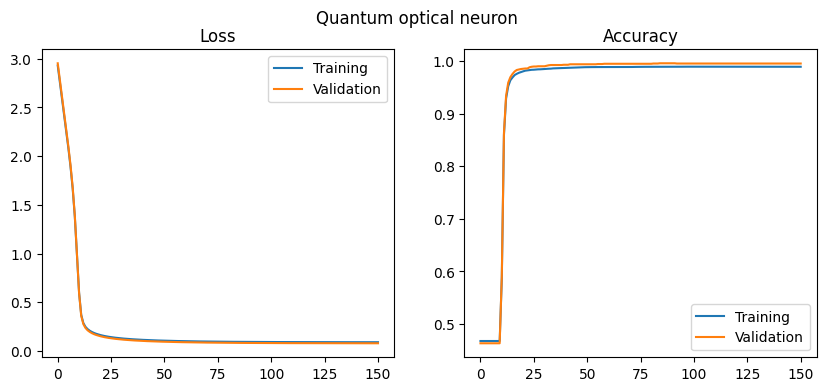

In [ ]:
# History plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(loss_history, label = 'Training')
ax1.plot(test_loss_history, label = 'Validation')

ax1.set_title('Loss')
ax1.legend()

ax2.plot(accuracy_history, label = 'Training')
ax2.plot(test_accuracy_history, label = 'Validation')

ax2.set_title('Accuracy')
ax2.legend()

fig.suptitle('Quantum optical neuron')
plt.show()

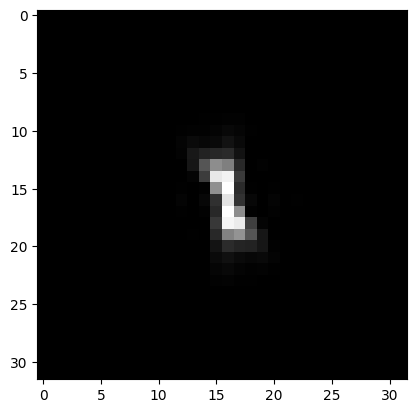

In [ ]:
# Parameters plot
# Normalization
norm = np.sum(np.square(weights))
weights = weights/np.sqrt(norm)

probWeights = np.square(weights)

plt.imshow(probWeights)
plt.gray()

plt.show()

### Single neuron

In [ ]:
model = models.Sequential()

model.add(layers.Flatten(input_shape=(32, 32, 1)))
model.add(layers.Dense(1, activation='sigmoid', use_bias=True))

model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = optimizers.SGD(learning_rate = learningRateWeights)
model.compile(optimizer=optimizer, loss='binary_crossentropy', \
              metrics=['accuracy'])
dense_history = model.fit(np.abs(trainFourierImgs), trainLabels, \
                    batch_size = trainImgs.shape[0], \
                    epochs = numEpochs,
                    validation_data=(np.abs(testFourierImgs), testLabels))

Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.6955 - accuracy: 0.5323 - val_loss: 0.6946 - val_accuracy: 0.5366
Epoch 2/150
1/1 [==============================] - 0s 154ms/step - loss: 0.6948 - accuracy: 0.5323 - val_loss: 0.6939 - val_accuracy: 0.5366
Epoch 3/150
1/1 [==============================] - 0s 138ms/step - loss: 0.6940 - accuracy: 0.5323 - val_loss: 0.6931 - val_accuracy: 0.5366
Epoch 4/150
1/1 [==============================] - 0s 113ms/step - loss: 0.6933 - accuracy: 0.5323 - val_loss: 0.6924 - val_accuracy: 0.5366
Epoch 5/150
1/1 [==============================] - 0s 97ms/step - loss: 0.6926 - accuracy: 0.5323 - val_loss: 0.6916 - val_accuracy: 0.5366
Epoch 6/150
1/1 [==============================] - 0s 133ms/step - loss: 0.6918 - accuracy: 0.5323 - val_loss: 0.6909 - val_accuracy: 0.5366
Epoch 7/150
1/1 [==============================] - 0s 136ms/step - loss: 0.6911 - accuracy: 0.5323 - val_loss: 0.6902 - val_accuracy: 0.5366
Epoch 8/150
1/1 [

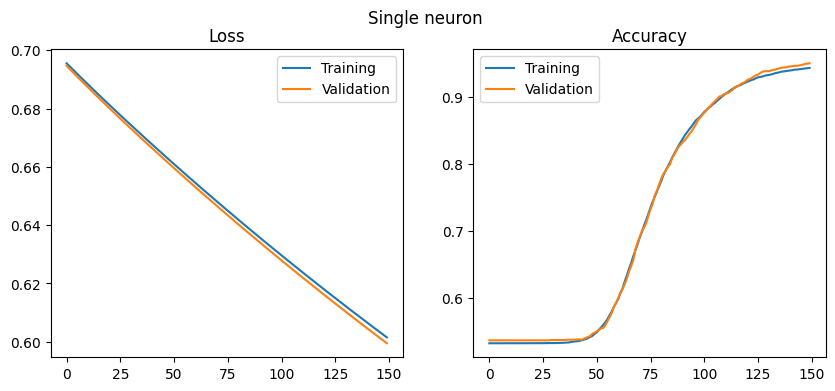

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(dense_history.history['loss'], label = 'Training')
ax1.plot(dense_history.history['val_loss'], label = 'Validation')

ax1.set_title('Loss')
ax1.legend()

ax2.plot(dense_history.history['accuracy'], label = 'Training')
ax2.plot(dense_history.history['val_accuracy'], label = 'Validation')

ax2.set_title('Accuracy')
ax2.legend()

fig.suptitle('Single neuron')
plt.show()

### Convolutional network

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(10, (3, 3), activation='linear', use_bias=False, \
                        input_shape=(32, 32, 1)))
model.add(layers.Conv2D(4, (2, 2), activation='linear', use_bias=False))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid', use_bias=True))

model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 10)        90        
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 4)         160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 4)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 785       
                                                                 
Total params: 1035 (4.04 KB)
Trainable params: 1035 (4.04 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [ ]:
optimizer = optimizers.SGD(learning_rate = learningRateWeights)
model.compile(optimizer=optimizer, loss='binary_crossentropy', \
              metrics=['accuracy'])
conv_history = model.fit(np.abs(trainFourierImgs), trainLabels, \
                    batch_size = trainImgs.shape[0], \
                    epochs = numEpochs,
                    validation_data=(np.abs(testFourierImgs), testLabels))

Epoch 1/150
1/1 [==============================] - 6s 6s/step - loss: 0.6949 - accuracy: 0.4738 - val_loss: 0.6947 - val_accuracy: 0.4752
Epoch 2/150
1/1 [==============================] - 7s 7s/step - loss: 0.6946 - accuracy: 0.4759 - val_loss: 0.6944 - val_accuracy: 0.4742
Epoch 3/150
1/1 [==============================] - 5s 5s/step - loss: 0.6944 - accuracy: 0.4755 - val_loss: 0.6942 - val_accuracy: 0.4657
Epoch 4/150
1/1 [==============================] - 5s 5s/step - loss: 0.6942 - accuracy: 0.4697 - val_loss: 0.6939 - val_accuracy: 0.4539
Epoch 5/150
1/1 [==============================] - 7s 7s/step - loss: 0.6939 - accuracy: 0.4558 - val_loss: 0.6937 - val_accuracy: 0.4355
Epoch 6/150
1/1 [==============================] - 5s 5s/step - loss: 0.6937 - accuracy: 0.4373 - val_loss: 0.6935 - val_accuracy: 0.4170
Epoch 7/150
1/1 [==============================] - 6s 6s/step - loss: 0.6935 - accuracy: 0.4220 - val_loss: 0.6933 - val_accuracy: 0.4468
Epoch 8/150
1/1 [=================

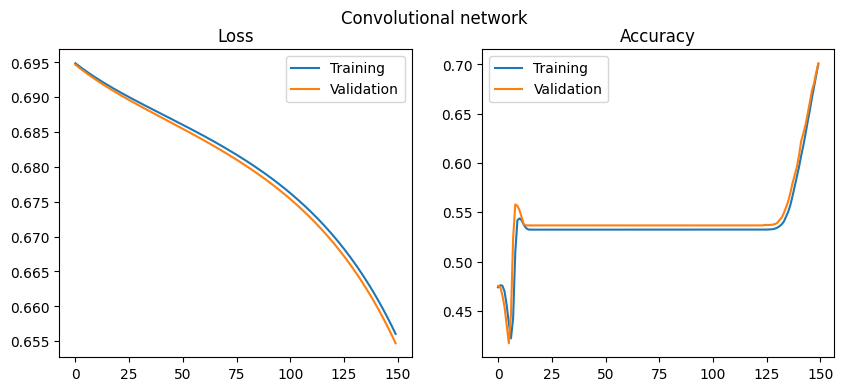

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(conv_history.history['loss'], label = 'Training')
ax1.plot(conv_history.history['val_loss'], label = 'Validation')

ax1.set_title('Loss')
ax1.legend()

ax2.plot(conv_history.history['accuracy'], label = 'Training')
ax2.plot(conv_history.history['val_accuracy'], label = 'Validation')

ax2.set_title('Accuracy')
ax2.legend()

fig.suptitle('Convolutional network')
plt.show()

## Comparison

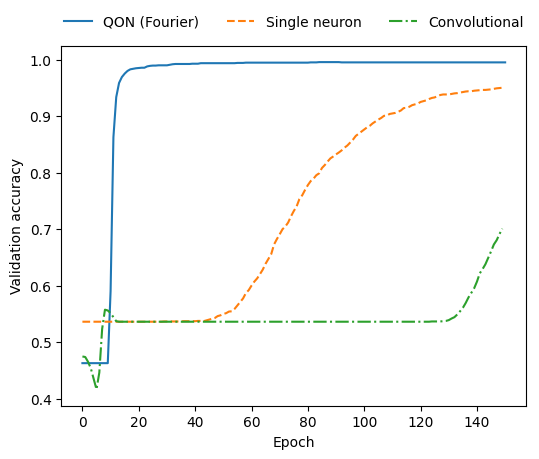

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 5.5))

# Main plot
ax1.plot(test_accuracy_history, linestyle = '-', \
         label = 'QON (Fourier)')

ax1.plot(dense_history.history['val_accuracy'], linestyle = '--', \
         label = 'Single neuron')

ax1.plot(conv_history.history['val_accuracy'], linestyle = '-.', \
         label = 'Convolutional')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation accuracy')

pos = ax1.get_position()
ax1.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
ax1.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12),
    ncol=3,
    frameon=False,
)

plt.show()

In [ ]:
# Quantum optical neuron history
np.save('output/data/MNISTfourier_OQPloss.npy', test_loss_history)
np.save('output/data/MNISTfourier_OQPacc.npy', test_accuracy_history)

# Single neuron history
np.save('output/data/MNISTfourier_MLPloss.npy', \
          np.array(dense_history.history['val_loss']))
np.save('output/data/MNISTfourier_MLPacc.npy', \
          np.array(dense_history.history['val_accuracy']))

# Convolutional network history
np.save('output/data/MNISTfourier_CONVloss.npy', \
          np.array(conv_history.history['val_loss']))
np.save('output/data/MNISTfourier_CONVacc.npy', \
          np.array(conv_history.history['val_accuracy']))